<a href="https://colab.research.google.com/github/adlihs/PyTorch/blob/main/Solving_Problems_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Person**: A bike delivery person with a 7-mile delivery order.

**Situation**: The company promises delivery in under 30 minutes and one more late delivery could put the job at risk.

**Question**: Can the bike delivery person makes this delivery on time?


**Next Steps based on ML pipeline:**


*   **Prepare** delivery data, the distances and times from past orders
*   **Build** a simple neural network using Pytorch
*   **Train** it to find the relationship between distance and delivery time.
*   **Predict** whether the delivery person can make that 7-mile delivery in time




## Imports

In [3]:
!pip install helper_utils

  Preparing metadata (setup.py) ... done
  Created wheel for helper_utils: filename=helper_utils-0.0.8-py3-none-any.whl size=6081 sha256=5848c401fd579cf0c861adc360b9ffb06f250ba98975fa2edfcaf2f0fafce93f
  Stored in directory: /root/.cache/pip/wheels/0d/c9/0b/294fee31b3dc5173031699ea99432767ec851eef54c1982dd0
Successfully built helper_utils


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

import helper_utils

torch.manual_seed(42)

## Data Ingestion and Preparation
Let's use some manual data to simulate delivery logs from a datasource

Two essential `tensors` for this task:

*   The `distance` tensor contains how far the person biked for four recent deliveries (in miles)
*   The `times` tensor shows how long each delivery took (in minutes)
*   `dtype=torch.float32` sets your data tyoe to 32-bit floating point values for precise calculations.



In [5]:
# distances in miles for recent bike deliveries
distances = torch.tensor([[1.0],[2.0],[3.0],[4.0]], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([[6.96],[12.11],[16.77],[22.21]], dtype=torch.float32)

## Model Building
Let's assume, for bike deliveries, a linear relationship between distance and time.
The model will be a single neuron that learns this relationship.

A single neuron with one input implements a linear equation:
| `Time = W * Distance + B`

The idea is to find the best value for **weight (W)** and **bias (B)** that the delivery data.

In [6]:
# Create a model with one input (distance) and one output (time)
model = nn.Sequential(nn.Linear(1,1))

## Training
Two key tools  to help the model learn from data:

*   **Loss Function:** `nn.MSELoss` defines the Mean Squared Error loss function
*   **Optimizer:** `optim.SGD` sets up the Stochastic Gradient Descent optimizer.
    * `lr=0.01` as learning rate.



In [7]:
# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
# Training loop
for epoch in range(500):
  # Reset the optimizer's gradients
  optimizer.zero_grad()

  # Make predictions (forward pass)
  outputs = model(distances)

  # Calculate the loss
  loss = loss_function(outputs, times)

  # Calculate adjustments (backward pass)
  loss.backward()

  # Update the model's parameters
  optimizer.step()

  # Print loss every 50 epochs
  if (epoch + 1) % 50 == 0:
    print(f"epoch {epoch + 1}: Loss = {loss.item()}")


epoch 50: Loss = 0.03944866359233856
epoch 100: Loss = 0.035811737179756165
epoch 150: Loss = 0.0331188440322876
epoch 200: Loss = 0.03112369030714035
epoch 250: Loss = 0.029645616188645363
epoch 300: Loss = 0.02855011820793152
epoch 350: Loss = 0.0277385413646698
epoch 400: Loss = 0.027137158438563347
epoch 450: Loss = 0.026691725477576256
epoch 500: Loss = 0.026361485943198204


## Visualizing the training results
Let's use the `plot_results`, this will show:



*   Original data points (actual deliveries)
*   The line the model learned (it's predictions)
*   How well they match








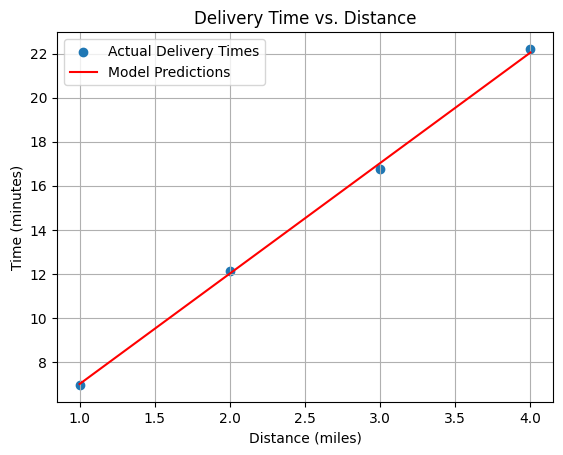

In [9]:
import matplotlib.pyplot as plt

def plot_results(model, distances, times):
    # Plot original data points
    plt.scatter(distances.numpy(), times.numpy(), label='Actual Delivery Times')

    # Get model predictions
    with torch.no_grad(): # Disable gradient calculation for inference
        predicted_times = model(distances)

    # Plot the learned line
    plt.plot(distances.numpy(), predicted_times.numpy(), color='red', label='Model Predictions')

    plt.xlabel('Distance (miles)')
    plt.ylabel('Time (minutes)')
    plt.title('Delivery Time vs. Distance')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_results(model, distances, times)

## Make Predictions
Let's setup the `distance_to_predict` to `7.0` and wrapp the entire prediction in `with torch.no_grad()` block.
This block will tell Pytorch we are not training anymore, just making prediction

In [10]:
distance_to_predict = 7

In [11]:
# Use the torch.no_grad() context manager for efficent predictions
with torch.no_grad():
  # Connvert the Python variable into a 2D Pytorch tensor that model expects
  new_distance = torch.tensor([[distance_to_predict]], dtype=torch.float32)

  # Pass the new data to the trained model to get a prediction
  predicted_time = model(new_distance)

  # Use .item() to extract the scalar value form the tensor for printing
  print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time.item():.1f} minutes")

  # Use the scalar value in a conditional statement to make the final decision
  if predicted_time.item()>30:
    print("\nDecision: Do NOT take the job. You will likely be late")
  else:
    print("\nDecision: Take the job. You can make it!")

Prediction for a 7-mile delivery: 37.1 minutes

Decision: Do NOT take the job. You will likely be late


## Inspecting the Model's Learning
Let's inspect the model's internal parameters, the final **weight** and **bias** values it discovered during training.

In [12]:
# Acess the firs (and only) layer in the sequential model
layer = model[0]

# Get weights and bias
weights = layer.weight.data.numpy()
bias = layer.bias.data.numpy()

print(f"Weight: {weights}")
print(f"Bias: {bias}")

Weight: [[5.015503]]
Bias: [1.9849645]


## Interpreting the Results



*   Weight (~5.0): This means that for each additional mile, the model predicts the delivery time will increase by 5.0 minutes.
*   Bias (~2.0): This represents the base time for any delivery, regradless of distance.

The model has discovered a linear relationship between distance and time, using the equation:



> `Time = 5.0 * Distance + 2.0`





## Testing the model on more complex data
Let's assume that any delivery  over 3 miles will now be made by car instead of bike.

So now the dataset include a mix of bike and car deliveires.

In [13]:
# Combined dataset: bikes for short distances, cars for longer ones
new_distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
new_times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

## Handle this new mixed dataset.

Let's see how the new model handle the mixed dataset.
Using the trained `model` to generates predictions on the `new_distances`

In [14]:
# Use the already trained linear model to make predictions
with torch.no_grad():
  predictions = model(new_distances)

In [15]:
# Calculate the new loss
new_loss = loss_function(predictions, new_times)
print(f"Loss on new, combined data: {new_loss.item():.2f}")

Loss on new, combined data: 179.26


##
Let's visualizing what's happening to understand why the loss is so high

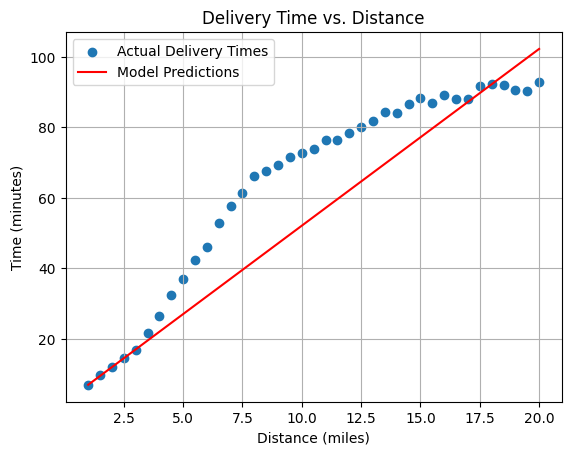

In [16]:
plot_results(model, new_distances, new_times)

##
**Why the linear model failed?**

The model performed well on bike only data, where the relationship between distance and time was fairly consistent. But with the new dataset, things changed.

The loss is much higher and a quick look at the visualization showed why:

**Actual Data (blue points)**: Delivery times follow a more complex pattern. Bikes take short, direct routes. Cars deal with city traffic, then speed up on highways. The relationship between distance and time isn’t smooth or consistent, it bends and shifts.

**Model Predictions (red line)**: Your model can only draw a straight line. It learned one pattern: each mile adds about the same amount of time. But now that assumption no longer holds.